In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
data=pd.read_excel(url,sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
data.drop(['Type','Coverage','AREA','REG','DEV','DevName'],axis=1,inplace=True)
data.rename({'OdName':'Country','AreaName':'Continent','RegName':'Region'},axis=1,inplace=True)
data.set_index('Country',inplace=True)
data["Total"]=data.sum(axis=1)
data.columns=data.columns.astype('str')
all(isinstance(value,str) for value in data.columns)
data.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [19]:
new=data[data.index.isin(['Norway','Denmark','Sweden'])].reset_index()
new_df=new.iloc[:,[0,-1]]
new_df

,Country,Total
0,Denmark,3901
1,Norway,2327
2,Sweden,5866


In [25]:
tot=new_df['Total'].sum()
proportion=[(value/tot) for value in new_df['Total']]
new_df

,Country,Total,Proportion
0,Denmark,3901,0.322557
1,Norway,2327,0.192409
2,Sweden,5866,0.485034


In [35]:
for i,value in enumerate(proportion):
    print(str(new_df['Country'].values[i]) + ': ' + str(value))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [39]:
h=10
w=40
total_tiles=h*w
tiles_pc=[round(total_tiles*value) for value in proportion]
tiles_pc

[129.0, 77.0, 194.0]

In [44]:
waffle=np.zeros((h,w))

10

In [85]:
category,index=0,0
for row in range(h):
    for col in range(w):
        index=index+1
        if index>sum(tiles_pc[0:category]):
            category+=1
        waffle[row,col]=category
waffle
        

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
   

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text yticklabel objects>)

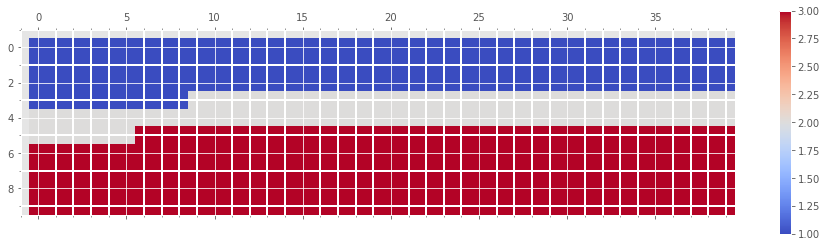

In [86]:
colormap=plt.cm.coolwarm
arr=np.arange(-1,w,1)

plt.matshow(waffle,cmap=colormap)
plt.colorbar()
plt.gca().set_xticks(arr,minor=True)
plt.gca().set_yticks(np.arange(-1,h,1),minor=True)
plt.gca().grid(which='minor',color='w',linestyle='-',linewidth=2)
plt.xticks()
plt.yticks()